<span style="color: #60B5FC; font-weight: bold; font-size: 24px;">02 Training different models</span>

<span style="color: #AC1555; font-weight: bold; font-size: 18px;">Libraries</span>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

<span style="color: #AC1555; font-weight: bold; font-size: 18px;">Dataframe</span>

In [31]:
df = pd.read_csv('/Users/anagilabert/repos/students_exam_scores/data/Expanded_data_with_more_features.csv', index_col=0)
df = df.drop(['ReadingScore', 'WritingScore'], axis=1)


<span style="color: #AC1555; font-weight: bold; font-size: 18px;">Format review</span>

In [32]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

<span style="color: #AC1555; font-weight: bold; font-size: 18px;">Functions</span>

In [33]:
class CustomTransformer:
    def __init__(self, transformations):
        self.transformations = transformations

    def transform(self, X):
        X_copy = X.copy()
        for column, mapping in self.transformations.items():
            X_copy[column] = X_copy[column].map(mapping)
        return X_copy

    def fit(self, X, y=None):
        return self

# Wrap the custom transformer using FunctionTransformer
custom_transformer = FunctionTransformer(CustomTransformer(transformations).transform)


def split_train_test(X, y):
    # Split the data into a training set (60%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

    # Split the remaining data into a validation set (20%) and a test set (20%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    df_train = pd.concat([X_train, y_train], axis=1)
    df_val = pd.concat([X_val, y_val], axis=1)
    df_test = pd.concat([X_test, y_test], axis=1)

    return X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val

In [34]:
def calculate_regression_metrics(pipeline, X_test, y_test, X_val, y_val):
    # Predict using the pipeline
    y_test_pred = pipeline.predict(X_test)
    y_val_pred = pipeline.predict(X_val)

    # Calculate MAE for the test and validation datasets
    test_mae = mean_absolute_error(y_test, y_test_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # Calculate MSE for the test and validation datasets
    test_mse = mean_squared_error(y_test, y_test_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    # Calculate RMSE for the test and validation datasets
    test_rmse = np.sqrt(test_mse)
    val_rmse = np.sqrt(val_mse)

    # Calculate R-squared (R^2) for the test and validation datasets
    test_r2 = r2_score(y_test, y_test_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Print the regression metrics
    print("Test MAE:", test_mae)
    print("Validation MAE:", val_mae)
    print("\nTest MSE:", test_mse)
    print("Validation MSE:", val_mse)
    print("\nTest RMSE:", test_rmse)
    print("Validation RMSE:", val_rmse)
    print("\nTest R-squared:", test_r2)
    print("Validation R-squared:", val_r2)


In [35]:
def calculate_regression_metrics_random(random_search, X_test, y_test, X_val, y_val):
    # Predict using the pipeline
    y_test_pred = random_search.predict(X_test)
    y_val_pred = random_search.predict(X_val)

    # Calculate MAE for the test and validation datasets
    test_mae = mean_absolute_error(y_test, y_test_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # Calculate MSE for the test and validation datasets
    test_mse = mean_squared_error(y_test, y_test_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    # Calculate RMSE for the test and validation datasets
    test_rmse = np.sqrt(test_mse)
    val_rmse = np.sqrt(val_mse)

    # Calculate R-squared (R^2) for the test and validation datasets
    test_r2 = r2_score(y_test, y_test_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Print the regression metrics
    print("Test MAE:", test_mae)
    print("Validation MAE:", val_mae)
    print("\nTest MSE:", test_mse)
    print("Validation MSE:", val_mse)
    print("\nTest RMSE:", test_rmse)
    print("Validation RMSE:", val_rmse)
    print("\nTest R-squared:", test_r2)
    print("Validation R-squared:", val_r2)
    
    # Return predicted values
    return y_test_pred, y_val_pred

In [36]:
def create_scatter_plot(y_actual, y_predicted, title, color):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_predicted, color=color, label='Data')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def create_residual_histogram(y_actual, y_predicted, title, color):
    plt.figure(figsize=(8, 6))
    plt.hist(y_actual - y_predicted, bins=20, color=color, alpha=0.5)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True)
    plt.show()

def create_predicted_values_histogram(y_predicted, title, color):
    plt.figure(figsize=(8, 6))
    plt.hist(y_predicted, bins=20, color=color, alpha=0.5)
    plt.xlabel('Predicted Values')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True)
    plt.show()

<span style="color: #59082A; font-weight: bold; font-size: 20px;">Training different models</span>

In [37]:
target_column = 'mathscore'

education_levels = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5,
}

# Define a dictionary with the transformations you want to apply to specific columns in your dataset
transformations = {
    'parenteduc': education_levels,
    'practicesport': {'never': 0, 'sometimes': 1, 'regularly': 2},
    'wklystudyhours': {'<5h': 0, '5-10h': 1, '>10h': 2},
    'testprep': {'none': 0, 'completed': 1},
    'isfirstchild': {'yes': 1, 'no': 0}
}

target_column = 'mathscore'

education_levels = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5,
}

# Define a dictionary with the transformations you want to apply to specific columns in your dataset
transformations = {
    'parenteduc': education_levels,
    'practicesport': {'never': 0, 'sometimes': 1, 'regularly': 2},
    'wklystudyhours': {'<5h': 0, '5-10h': 1, '>10h': 2},
    'testprep': {'none': 0, 'completed': 1},
    'isfirstchild': {'yes': 1, 'no': 0}
}

# Automatically identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns.remove(target_column)

# Create transformers for specific categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


<span style="color: #AC1555; font-weight: bold; font-size: 18px;">Random Forest Classifier</span> 

In [38]:

# # Define the column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('categorical', categorical_transformer, categorical_columns),
#         ('numerical', numerical_transformer, numerical_columns),
#         ('custom', custom_transformer, list(transformations.keys()))
#     ],
#     remainder='passthrough'
# )

# # Step 3: Machine Learning Model
# classifier = RandomForestClassifier()

# # Create the pipeline
# pipeline = Pipeline([
#     ('preprocessing', preprocessor),
#     ('classifier', classifier)
# ])

# X = df.drop(columns=[target_column])
# y = df[target_column]

# X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val = split_train_test(X, y)

# # Fit the pipeline
# pipeline.fit(X_train, y_train)

# # Predict using the pipeline
# y_pred = pipeline.predict(X_test)


In [39]:
#calculate_regression_metrics(pipeline, X_test, y_test, X_val, y_val)

<span style="color: #AC1555; font-weight: bold; font-size: 18px;">Linear Regression</span> 

In [43]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_columns),
        ('numerical', numerical_transformer, numerical_columns),
        ('custom', custom_transformer, list(transformations.keys()))
    ],
    remainder='passthrough'
)

# Step 3: Machine Learning Model
classifier = LinearRegression()

# Create the pipeline with imputer to handle missing values
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('imputer', SimpleImputer(strategy='median')),  # Add an imputer to handle missing values
    ('classifier', classifier)
])

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val = split_train_test(X, y)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)


In [44]:
calculate_regression_metrics(pipeline, X_test, y_test, X_val, y_val)

Test MAE: 10.598898423478545
Validation MAE: 10.423495379813968

Test MSE: 170.1985860617014
Validation MSE: 165.6640295621309

Test RMSE: 13.046018015536442
Validation RMSE: 12.87105394138844

Test R-squared: 0.28193932882296735
Validation R-squared: 0.29433698771998085


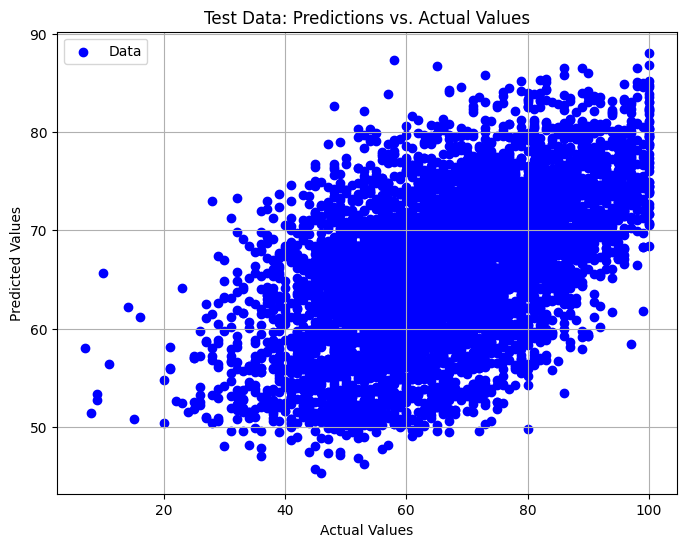

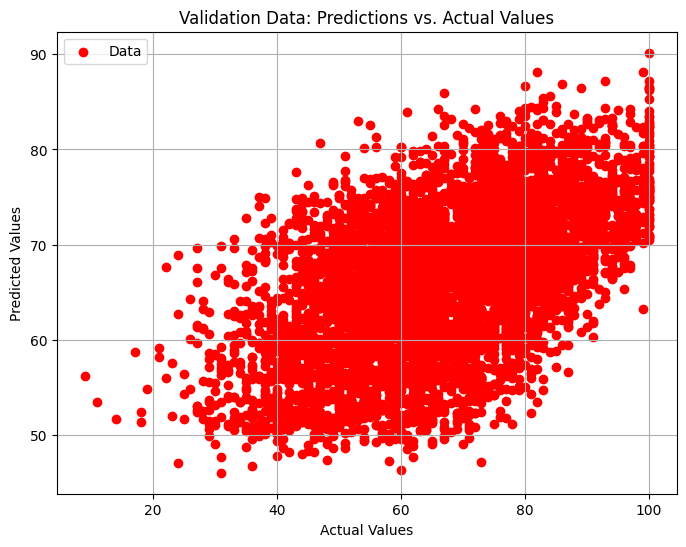

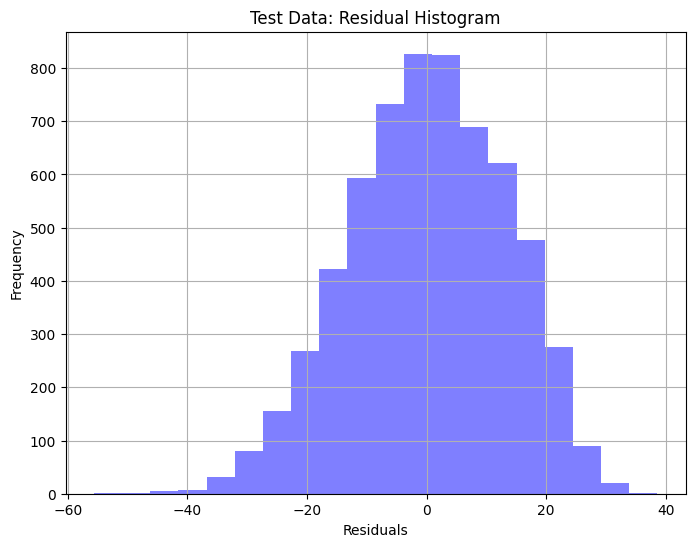

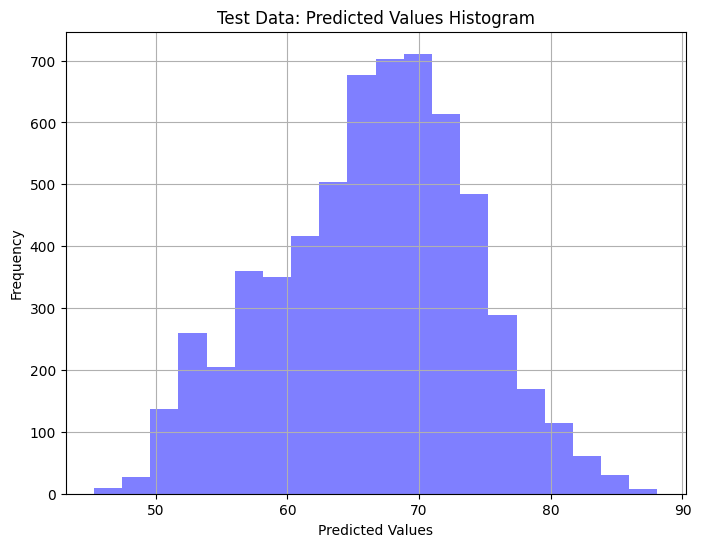

In [45]:
create_scatter_plot(y_test, y_test_pred, 'Test Data: Predictions vs. Actual Values', 'blue')
create_scatter_plot(y_val, y_val_pred, 'Validation Data: Predictions vs. Actual Values', 'red')
create_residual_histogram(y_test, y_test_pred, 'Test Data: Residual Histogram', 'blue')
create_predicted_values_histogram(y_test_pred, 'Test Data: Predicted Values Histogram', 'blue')

<span style="color: #AC1555; font-weight: bold; font-size: 18px;">Xgboost Regressor</span>  


In [46]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_columns),
        ('numerical', numerical_transformer, numerical_columns),
        ('custom', custom_transformer, list(transformations.keys()))
    ],
    remainder='passthrough'
)

# Step 3: Machine Learning Model
regressor = XGBRegressor()

# Create the pipeline with imputer to handle missing values
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('imputer', SimpleImputer(strategy='median')),  # Add an imputer to handle missing values
    ('regressor', regressor)
])

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val = split_train_test(X, y)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)


In [47]:
calculate_regression_metrics(pipeline, X_test, y_test, X_val, y_val)

Test MAE: 11.034314291106485
Validation MAE: 10.868053863316229

Test MSE: 185.68479317710052
Validation MSE: 179.81496624202518

Test RMSE: 13.626620754137855
Validation RMSE: 13.409510290910148

Test R-squared: 0.21660367279560921
Validation R-squared: 0.2340596141071839


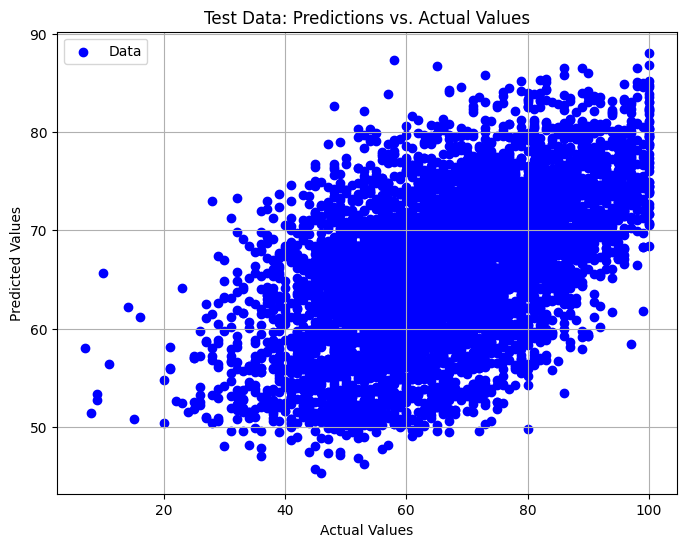

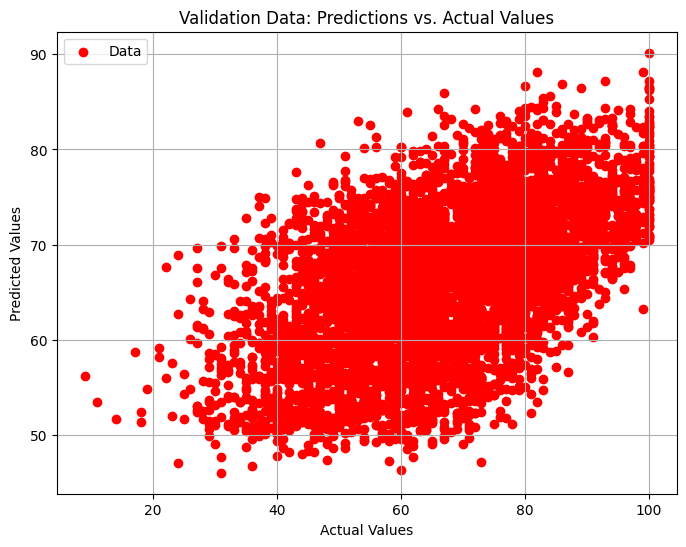

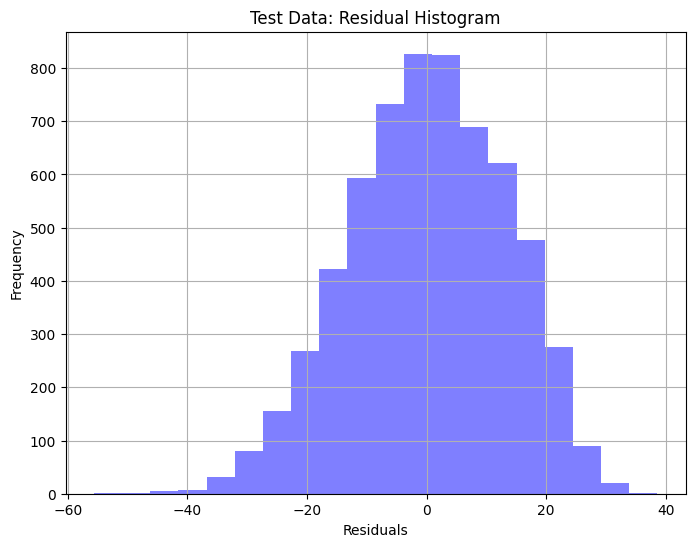

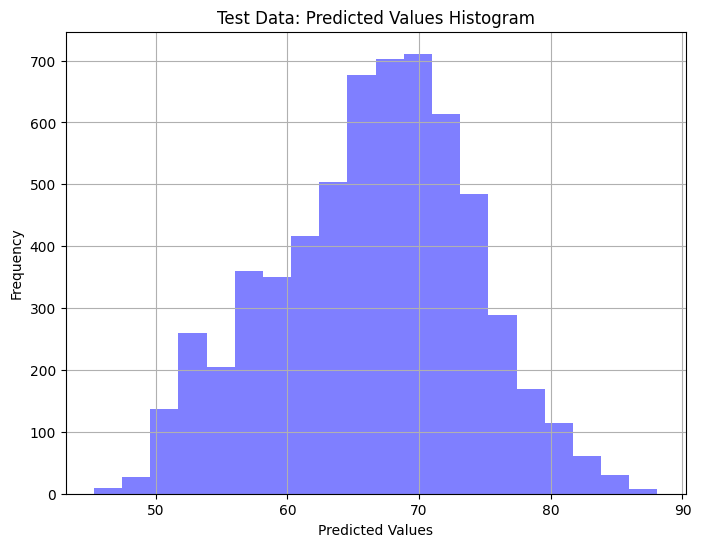

In [48]:
create_scatter_plot(y_test, y_test_pred, 'Test Data: Predictions vs. Actual Values', 'blue')
create_scatter_plot(y_val, y_val_pred, 'Validation Data: Predictions vs. Actual Values', 'red')
create_residual_histogram(y_test, y_test_pred, 'Test Data: Residual Histogram', 'blue')
create_predicted_values_histogram(y_test_pred, 'Test Data: Predicted Values Histogram', 'blue')

<span style="color: #AC1555; font-weight: bold; font-size: 18px;">Xgboost Regressor</span>  


<span style="color: #AC1555; font-size: 15px;">Without using transformations variable</span> 

In [49]:
# Automatically identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns.remove(target_column)

# Create transformers for specific categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_columns),
        ('numerical', numerical_transformer, numerical_columns),
    ],
    remainder='passthrough'
)

# Step 3: Machine Learning Model
regressor = XGBRegressor()

# Create the pipeline with imputer to handle missing values
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('imputer', SimpleImputer(strategy='median')),
    ('regressor', regressor)
])


X = df.drop(columns=[target_column])
y = df[target_column]

X_train, y_train, X_test, y_test, X_val, y_val, df_train, df_test, df_val = split_train_test(X, y)

param_dist = {
    'regressor__n_estimators': np.arange(100, 1000, 100), 
    'regressor__learning_rate': [0.01, 0.1, 0.2],  
    'regressor__max_depth': np.arange(3, 10, 1),  
    'regressor__min_child_weight': np.arange(1, 6, 1), 
    'regressor__gamma': [0, 0.1, 0.2], 
    'regressor__subsample': [0.8, 0.9, 1.0], 
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)


random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


Mejores hiperparámetros: {'regressor__subsample': 0.9, 'regressor__n_estimators': 300, 'regressor__min_child_weight': 3, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.01, 'regressor__gamma': 0}


In [50]:
y_test_pred, y_val_pred = calculate_regression_metrics_random(random_search, X_test, y_test, X_val, y_val)

Test MAE: 10.68221543496148
Validation MAE: 10.509042406829156

Test MSE: 173.04512911288916
Validation MSE: 167.50819380539852

Test RMSE: 13.154661877558432
Validation RMSE: 12.942495655993033

Test R-squared: 0.2699298834969692
Validation R-squared: 0.286481580010275


<span style="color: #AC1555; font-size: 15px;">We get **almost the same result** with and without using the **transformations variable**, so we decided not to use it.</span> 

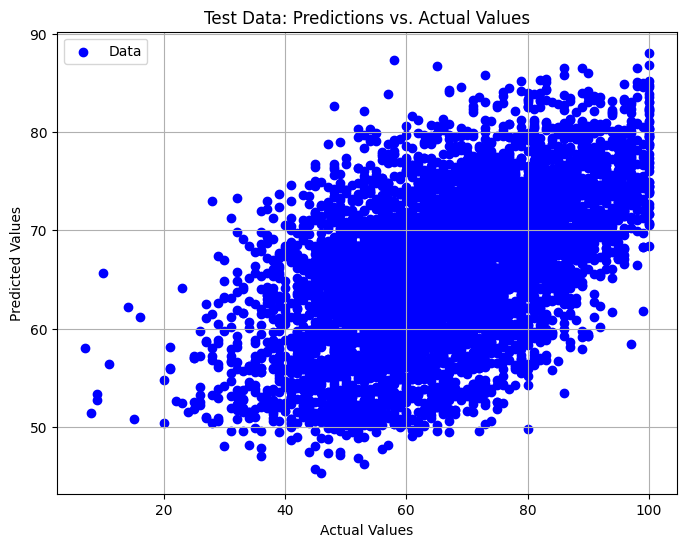

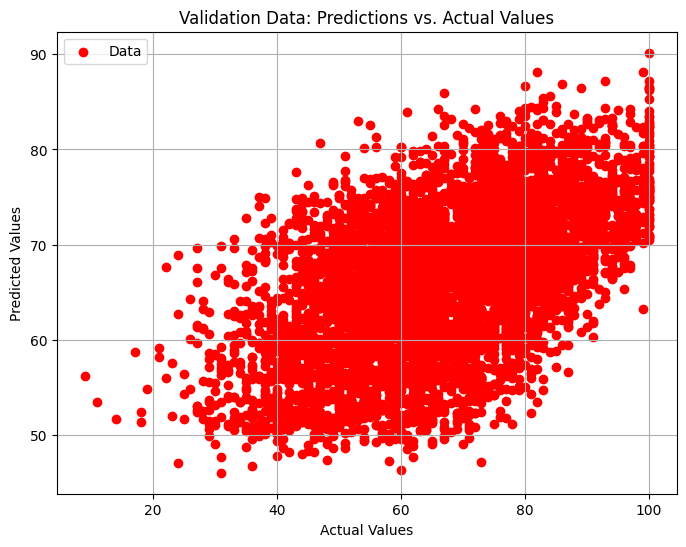

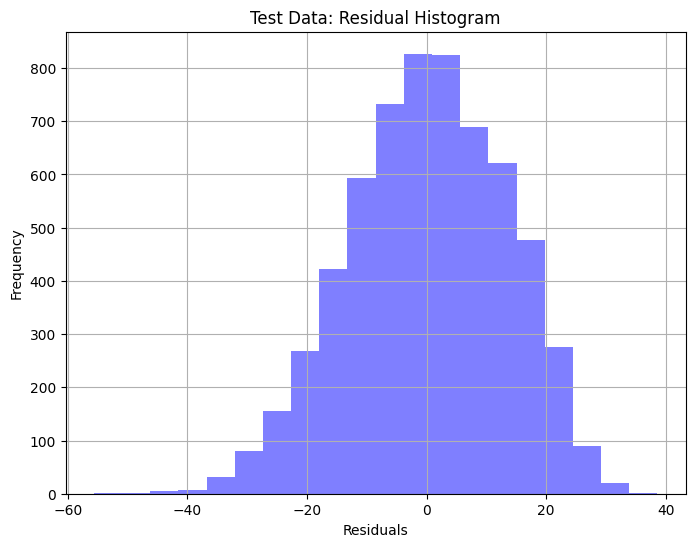

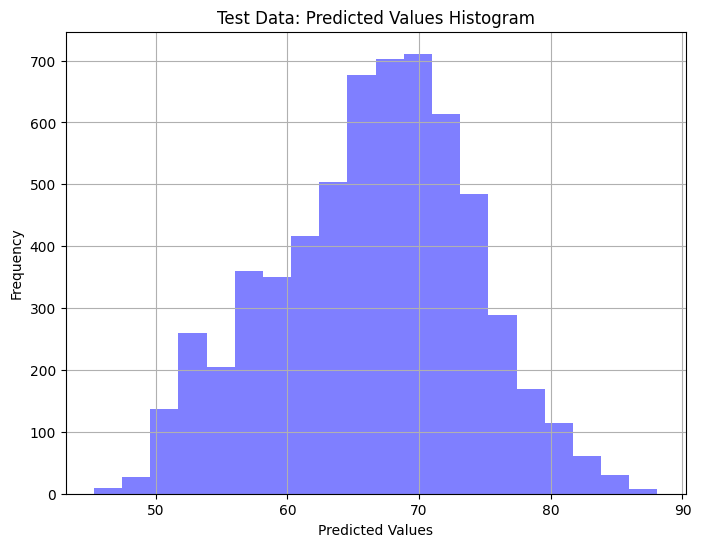

In [51]:
create_scatter_plot(y_test, y_test_pred, 'Test Data: Predictions vs. Actual Values', 'blue')
create_scatter_plot(y_val, y_val_pred, 'Validation Data: Predictions vs. Actual Values', 'red')
create_residual_histogram(y_test, y_test_pred, 'Test Data: Residual Histogram', 'blue')
create_predicted_values_histogram(y_test_pred, 'Test Data: Predicted Values Histogram', 'blue')